In [ ]:
!pip install textattack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 67.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 63.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.7/445.7 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from textattack.datasets import HuggingFaceDataset

dataset = HuggingFaceDataset("imdb", split="test")  # Example with IMDb


textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set i

README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

textattack: Loading datasets dataset imdb, split test.


In [ ]:
dataset[0]

(OrderedDict([('text',
               'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of

In [ ]:
!pip install nltk
import nltk
nltk.download('averaged_perceptron_tagger')
# Download the specific English language data for the averaged_perceptron_tagger
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from textattack.datasets import HuggingFaceDataset
from textattack.attack_recipes import TextFoolerJin2019
from textattack.models.wrappers import HuggingFaceModelWrapper
from textattack import Attacker, AttackArgs
import pandas as pd
from tqdm import tqdm
from textattack.attack_results import SuccessfulAttackResult, FailedAttackResult, SkippedAttackResult

# 1. Load IMDb dataset
dataset = HuggingFaceDataset("imdb", split="test")

# 2. Load pre-trained model and tokenizer
model_name = "textattack/bert-base-uncased-imdb"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Specify device for model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Define device
model.to(device) # Move model to the defined device

model_wrapper = HuggingFaceModelWrapper(model, tokenizer)

# 3. Define the adversarial attack
attack = TextFoolerJin2019.build(model_wrapper)

# 4. Configure attack arguments (disable logging to console)
attack_args = AttackArgs(
    num_examples=20,  # adjust number as needed
    disable_stdout=True,
)

attacker = Attacker(attack, dataset, attack_args)

# 5. Generate adversarial examples
attack_results = attacker.attack_dataset()

# 6. Process and save results
results = []

for result in tqdm(attack_results):
    if result.perturbed_result is None:
        continue

    original_text = result.original_result.attacked_text.text
    adversarial_text = result.perturbed_result.attacked_text.text

    # Determine attack success based on result type
    if isinstance(result, SuccessfulAttackResult):
        attack_success = True
    elif isinstance(result, FailedAttackResult):
        attack_success = False
    else:
        attack_success = None  # Skipped

    # Predict probability for adversarial
    inputs = tokenizer(adversarial_text, return_tensors="pt", truncation=True, padding=True)

    # Move inputs to the same device as the model
    inputs = inputs.to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1).squeeze()
        adv_prob = float(probs[1])  # Assuming label '1' is positive sentiment

    results.append({
        "original_text": original_text,
        "adversarial_text": adversarial_text,
        "attack_type": "TextFoolerJin2019",
        "is_adversarial": int(attack_success) if attack_success is not None else -1,  # -1 for skipped
        "adversarial_probability": round(adv_prob, 4)
    })

# 7. Save to CSV
df = pd.DataFrame(results)
df.to_csv("adversarial_output.csv", index=False)

print("✅ Done. Results saved to 'adversarial_output.csv'")

textattack: Loading datasets dataset imdb, split test.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.

  0%|          | 0.00/481M [00:00<?, ?B/s]
  0%|          | 86.0k/481M [00:00<14:10, 566kB/s]
  0%|          | 366k/481M [00:00<05:19, 1.50MB/s]
  0%|          | 1.50M/481M [00:00<01:37, 4.94MB/s]
  1%|          | 2.74M/481M [00:00<01:04, 7.37MB/s]
  1%|          | 3.68M/481M [00:00<01:01, 7.83MB/s]
  1%|          | 5.20M/481M [00:00<00:48, 9.79MB/s]
  1%|▏         | 6.34M/481M [00:00<00:46, 10.3MB/s]
  2%|▏         | 7.80M/481M [00:00<00:41, 11.5MB/s]
  2%|▏         | 9.19M/481M [00:01<00:40, 11.7MB/s]
  2%|▏         | 10.4M/481M [00:01<00:39, 11.8MB/s]
  2%|▏         | 11.8M/481M [00:01<00:38, 12.2MB/s]
  3%|▎         | 13.4M/481M [00:01<00:35, 13.3MB/s]
  3%|▎         | 14.7M/481M [00:01<00:36, 12.9MB/s]
  3%|▎         | 16.5M/481M [00:01<00:33, 14.1MB/s]
  4%|▎         | 17.9M/481M [00:01<00:48, 9.47MB/s]
  4%|▍         | 19.0M/481M [00:02<00:58, 7.84MB/s]
  4%|▍         | 20.7M/481M [00:02<00:

Attack(
  (search_method): GreedyWordSwapWIR(
    (wir_method):  delete
  )
  (goal_function):  UntargetedClassification
  (transformation):  WordSwapEmbedding(
    (max_candidates):  50
    (embedding):  WordEmbedding
  )
  (constraints): 
    (0): WordEmbeddingDistance(
        (embedding):  WordEmbedding
        (min_cos_sim):  0.5
        (cased):  False
        (include_unknown_words):  True
        (compare_against_original):  True
      )
    (1): PartOfSpeech(
        (tagger_type):  nltk
        (tagset):  universal
        (allow_verb_noun_swap):  True
        (compare_against_original):  True
      )
    (2): UniversalSentenceEncoder(
        (metric):  angular
        (threshold):  0.840845057
        (window_size):  15
        (skip_text_shorter_than_window):  True
        (compare_against_original):  False
      )
    (3): RepeatModification
    (4): StopwordModification
    (5): InputColumnModification(
        (matching_column_labels):  ['premise', 'hypothesis']
       

[Succeeded / Failed / Skipped / Total] 18 / 0 / 2 / 20: 100%|██████████| 20/20 [06:57<00:00, 20.88s/it]


+-------------------------------+--------+
| Attack Results                |        |
+-------------------------------+--------+
| Number of successful attacks: | 18     |
| Number of failed attacks:     | 0      |
| Number of skipped attacks:    | 2      |
| Original accuracy:            | 90.0%  |
| Accuracy under attack:        | 0.0%   |
| Attack success rate:          | 100.0% |
| Average perturbed word %:     | 11.13% |
| Average num. words per input: | 203.75 |
| Avg num queries:              | 624.78 |
+-------------------------------+--------+

100%|██████████| 20/20 [00:00<00:00, 51.53it/s]

✅ Done. Results saved to 'adversarial_output.csv'


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib

# Load CSV
df = pd.read_csv("adversarial_output.csv")

# Use 'adversarial_text' if available, otherwise fallback to original
df['text'] = df['adversarial_text'].fillna(df['original_text'])

# Features and label
X = df['text']
y = df['is_adversarial']  # 0 = clean, 1 = adversarial

# Split for training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train logistic regression classifier
clf = LogisticRegression()
clf.fit(X_train_vec, y_train)

#


LogisticRegression()

In [ ]:
import joblib

# Save the model and vectorizer first (ideally, you would have done this in cell 13)
joblib.dump(clf, "adv_detector_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

# Load model and vectorizer
clf = joblib.load("adv_detector_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Get user input
user_input = input("Enter your sentence: ")

# Vectorize and predict
user_vec = vectorizer.transform([user_input])
proba = clf.predict_proba(user_vec)[0][1]  # Probability of class 1 (adversarial)
label = clf.predict(user_vec)[0]

print("\n🔎 Prediction:")
print(f"→ Is adversarial? {'Yes' if label == 1 else 'No'}")
print(f"→ Adversarial probability: {round(proba, 4)}")

Enter your sentence: I didn’t say she stole the money

🔎 Prediction:
→ Is adversarial? Yes
→ Adversarial probability: 0.8643


In [ ]:
!pip install --upgrade transformers

In [ ]:
!pip install --upgrade transformers accelerate

**FINAL OUTPUT**

In [ ]:
import os
import pandas as pd
from datasets import Dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, pipeline

# Disable WandB logging
os.environ["WANDB_DISABLED"] = "true"

# Load and preprocess dataset
df = pd.read_csv("adversarial_output.csv")
df['text'] = df['adversarial_text'].fillna(df['original_text'])
df['is_adversarial'] = df['is_adversarial'].astype(int)
df = df[df['is_adversarial'].isin([0, 1])]
df = df[['text', 'is_adversarial']]

# Convert to HuggingFace Dataset
hf_dataset = Dataset.from_pandas(df)

# Tokenization
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
def tokenize(example):
    return tokenizer(example['text'], padding="max_length", truncation=True)

hf_dataset = hf_dataset.map(tokenize)
hf_dataset = hf_dataset.rename_column("is_adversarial", "label")
hf_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# Train/Test split
hf_dataset = hf_dataset.train_test_split(test_size=0.2)

# Load model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# TrainingArguments (compatible with old transformers)
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    logging_dir="./logs",
    logging_steps=10,
    eval_steps=100,
    save_steps=100,
    do_eval=True,
    do_train=True
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=hf_dataset["train"],
    eval_dataset=hf_dataset["test"]
)

# Train the model
trainer.train()

# Save model and tokenizer
model.save_pretrained("adv-bert-model")
tokenizer.save_pretrained("adv-bert-model")

# Inference
clf = pipeline("text-classification", model="adv-bert-model", tokenizer="adv-bert-model")

# User input
while True:
    text = input("\nEnter a sentence to classify (or type 'exit' to quit): ")
    if text.lower() == "exit":
        break
    result = clf(text)[0]
    label = result['label']
    score = result['score']

    print("\n🔍 Result:")
    print(f"→ Is adversarial? {'Yes' if label == 'LABEL_1' else 'No'}")
    print(f"→ Adversarial probability: {round(score, 4)}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/18 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Step,Training Loss


Device set to use cuda:0



Enter a sentence to classify (or type 'exit' to quit): The bank will not close unless the river flows backward while the account balances the statement under the chair of finance.

🔍 Result:
→ Is adversarial? Yes
→ Adversarial probability: 0.7327

Enter a sentence to classify (or type 'exit' to quit): The future always arrives tomorrow, but by the time you notice, it's already yesterday in disguise.

🔍 Result:
→ Is adversarial? Yes
→ Adversarial probability: 0.6893

Enter a sentence to classify (or type 'exit' to quit): The city buzzed with quiet energy as holograms floated above the streets, guiding people through their day. In every corner, AI companions whispered advice, jokes, and gentle reminders, blending so naturally into life that few even noticed them anymore. It wasn’t the future people had once feared; it was simply... normal.

🔍 Result:
→ Is adversarial? Yes
→ Adversarial probability: 0.7104

Enter a sentence to classify (or type 'exit' to quit): Shall I compare thee to a 

In [ ]:
pip install evaluate matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    acc = accuracy_metric.compute(predictions=predictions, references=labels)["accuracy"]
    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=hf_dataset["train"],
    eval_dataset=hf_dataset["test"],
    compute_metrics=compute_metrics
)


In [ ]:
!pip install -U evaluate
import evaluate

# Load the accuracy metric
accuracy_metric = evaluate.load("accuracy")

from sklearn.metrics import precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    acc = accuracy_metric.compute(predictions=predictions, references=labels)["accuracy"]
    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }

In [ ]:
!pip install --upgrade datasets

In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return accuracy.compute(predictions=predictions, references=labels)


In [ ]:
# Install required packages (if not already installed)
!pip install -U evaluate

# Import the library
import evaluate

# Load the accuracy metric
accuracy_metric = evaluate.load("accuracy")

# Example compute_metrics function for use in Trainer or evaluation
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Step,Training Loss
10,0.701400
20,0.702500
30,0.651300
40,0.478300
50,0.524100
60,0.506500
70,0.327900
80,0.320300
90,0.314900
100,0.370800


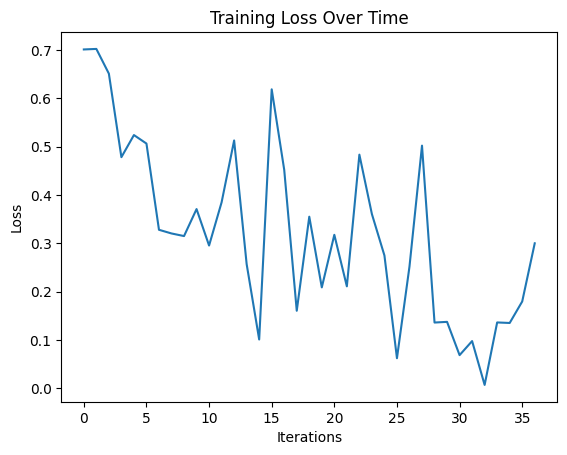

Test Accuracy: 0.8750


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("imdb")
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length")

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Set format for PyTorch
tokenized_datasets.set_format("torch", columns=["input_ids", "attention_mask", "label"])

# Load model
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Training arguments (using eval_steps for older versions)
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    save_steps=500,
    eval_steps=500,  # Perform evaluation every 500 steps
)

# Define compute_metrics to calculate accuracy
def compute_metrics(p):
    predictions, labels = p
    predictions = predictions.argmax(axis=-1)  # Get the index of the highest probability
    accuracy = accuracy_score(labels, predictions)  # Calculate accuracy
    return {"accuracy": accuracy}

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"].shuffle(seed=42).select(range(1000)),
    eval_dataset=tokenized_datasets["test"].select(range(1000)),
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Plot the training loss (it is stored in the Trainer's `state` object)
train_loss = trainer.state.log_history

# Extract loss values from the training logs
loss_values = [entry["loss"] for entry in train_loss if "loss" in entry]

# Plot the loss curve
plt.plot(loss_values)
plt.title("Training Loss Over Time")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

# Evaluate and print accuracy on the test set
eval_results = trainer.evaluate()
print(f"Test Accuracy: {eval_results['eval_accuracy']:.4f}")


In [ ]:
# Save the trained model and tokenizer to a directory
model.save_pretrained("./saved_model")
tokenizer.save_pretrained("./saved_model")


('./saved_model/tokenizer_config.json',
 './saved_model/special_tokens_map.json',
 './saved_model/vocab.txt',
 './saved_model/added_tokens.json',
 './saved_model/tokenizer.json')

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 126.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.6 MB/s eta 0:00:00


In [ ]:
!pip install streamlit
!pip install pyngrok


In [ ]:
import streamlit as st
from transformers import pipeline

# Load your trained model from 'saved_model'
@st.cache_resource
def load_model():
    return pipeline("text-classification", model="saved_model", tokenizer="saved_model")

clf = load_model()

# Streamlit Interface
st.title("🛡️ Adversarial Text Detector")
st.write("Enter a sentence to check if it's adversarial.")

user_input = st.text_area("Enter a sentence:", height=150)

if st.button("Analyze"):
    if user_input.strip():
        result = clf(user_input)[0]
        label = result['label']
        score = result['score']

        st.subheader("🔍 Result")
        st.write(f"**→ Is adversarial?** {'Yes' if label == 'LABEL_1' else 'No'}")
        st.write(f"**→ Adversarial Probability:** {round(score, 4)}")
    else:
        st.warning("Please enter some text.")


2025-05-11 03:46:46.102 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-11 03:46:46.103 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-11 03:46:46.104 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-11 03:46:46.105 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-11 03:46:46.106 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-11 03:46:46.107 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-11 03:46:46.108 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-11 03:46:46.108 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!pip install streamlit transformers pyngrok --quiet


In [ ]:
from google.colab import files
uploaded = files.upload()  # Zip your saved_model folder first


In [ ]:
!unzip saved_model.zip


unzip:  cannot find or open saved_model.zip, saved_model.zip.zip or saved_model.zip.ZIP.


In [ ]:
%%writefile app.py
import streamlit as st
from transformers import pipeline

# Load your trained model
@st.cache_resource
def load_model():
    return pipeline("text-classification", model="saved_model", tokenizer="saved_model")

clf = load_model()

st.title("🛡️ Adversarial Text Detector")
st.write("Enter a sentence to check if it's adversarial.")

user_input = st.text_area("Enter a sentence:", height=150)

if st.button("Analyze"):
    if user_input.strip():
        result = clf(user_input)[0]
        label = result['label']
        score = result['score']

        st.subheader("🔍 Result")
        st.write(f"**→ Adversarial Probability:** {round(score, 4)}")
    else:
        st.warning("Please enter some text.")


Overwriting app.py


In [ ]:
from pyngrok import ngrok
!streamlit run app.py &>/content/log.txt &
public_url = ngrok.connect(8501)
print("Streamlit app URL:", public_url)


Streamlit app URL: NgrokTunnel: "https://9aca-34-125-86-62.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
from pyngrok import ngrok

# Replace 'your_ngrok_token' with the actual token you got from your ngrok dashboard
ngrok.set_auth_token("2wPOXAqzYOJhERUt7tlOw6HYpQT_2sMxFJ8PhQXvsXD6cn35A")
